중요피처
  - ols모델보다는 머신러닝이용 피처중요도 선별
  - 상관계수 구해서 (선형모델이면 ) 높은 변수는 제거
    - vif (다중공선성)확인해서 높은 값은 제거하면서 피처선택


In [4]:
import pandas as pd

In [5]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/used_mobile_phone.csv'

In [6]:
df = pd.read_csv(filepath)
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [8]:
# 년,월,일로 새로운 피처 생성
df['year'] = df['create_date'].apply(lambda x: x[:4])
df['month'] = df['create_date'].apply(lambda x: x[5:7])
df['day'] = df['create_date'].apply(lambda x: x[8:10])

In [9]:
df.head(3)

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25


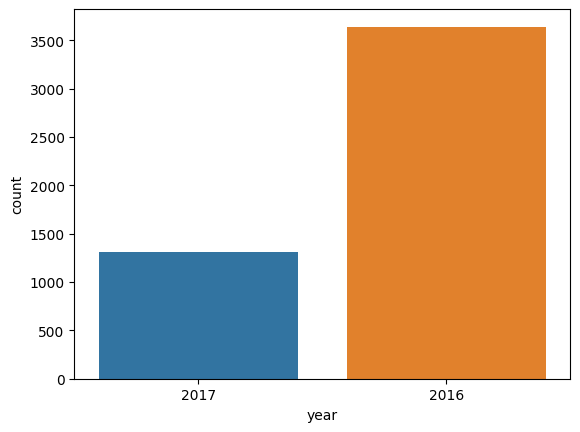

In [10]:
# 년도별 거래량 시각화
import seaborn as sns
import matplotlib.pyplot as plt
df['year'].value_counts()
sns.countplot(df, x='year')
# plt.bar(df['year'].value_counts())
# sns.countplot( df['year'].value_counts())
plt.show()

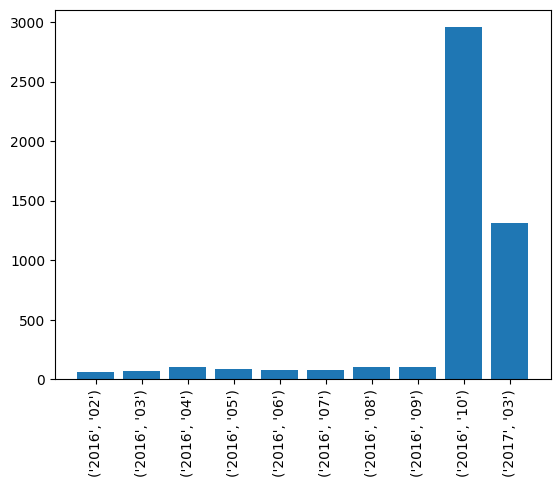

In [11]:
# 연도별 월별
new_df = df.groupby(['year','month'])['month'].count()
new_df.index, new_df.values
plt.bar(range(len(new_df.index)), new_df.values)
plt.xticks(range(len(new_df.index)), new_df.index, rotation=90)
plt.show()

<Axes: >

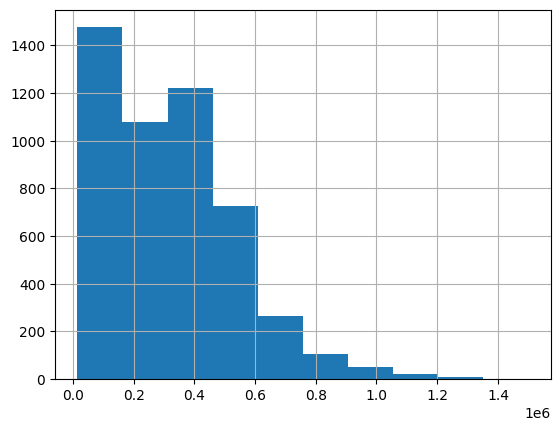

In [13]:
# 가격 피처 탐색
df['price'].hist()

In [18]:
#핸드폰 기종별 평균과 표준편차
  # 기종별 표준편차는 시장에서의 가격 변동성 및 시장동향
  # 적정한 가격 책정
  # 고객 인사이트 확보
import numpy as np
df_price_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))
df_price_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

<Axes: >

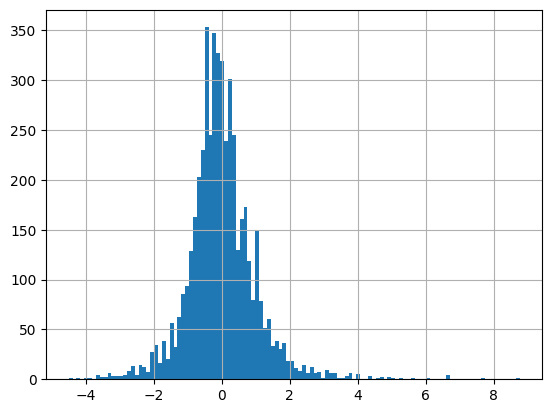

In [21]:
# z-score : 통계학에서 특정 데이터가 평균과 떨어진 정도 - 데이터내에서 어떤위치에 있는지 나타내는데 사용
#  (X - 평균) / 표준편차
# 해당 가격이 기종별 평균에 비해 어느정도로 높거나 낮은지를 알수있음
df_price_z_score = (df['price']-df_price_mean) / df_price_std
df_price_z_score.hist(bins='auto')

<Axes: >

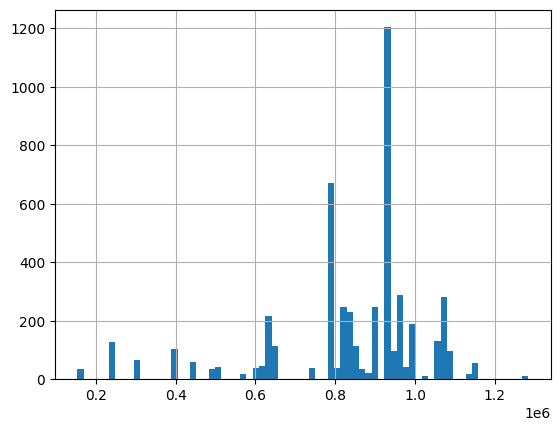

In [22]:
# 출고가 피처 탐색
df['factory_price'].hist(bins='auto')

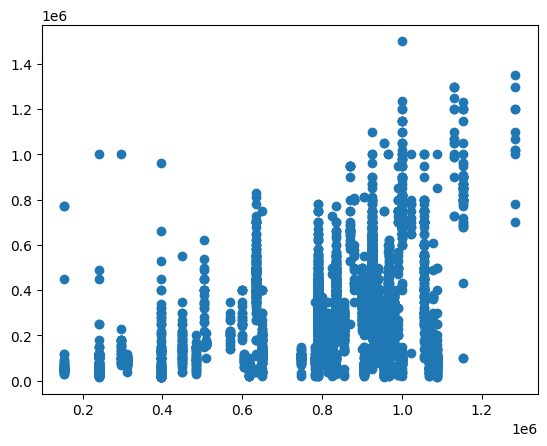

In [23]:
# 출고가와 중고거래가격의 상관관계
plt.scatter(df['factory_price'], df['price'])
plt.show()

In [25]:
# 핸드폰의 모델 탐색
model_counts = df['phone_model'].value_counts()
print(model_counts)
model_counts.describe()

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 7 plus 32gb       12
iphone 6s Plus 16gb      12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64


count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64

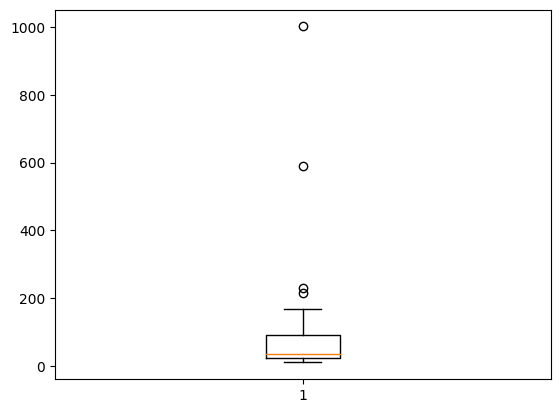

In [26]:
plt.boxplot(model_counts)
plt.show()

In [27]:
# Random Forest를 이용한 가격 예측
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,year,month,day
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017,03,19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016,10,26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016,10,25
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017,03,23
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016,04,11


In [29]:
# 필요한 라이브러리 인스톨
from sklearn.model_selection import train_test_split
# 사전형태의 데이터를 벡터화 - 모델에 사용가능  범주형 데이터를 수치형으로 변환
from sklearn.feature_extraction import DictVectorizer

In [31]:
data = [
    {'color':'red','size':'small'},
    {'color':'green','size':'medium'},
    {'color':'blue','size':'large'}
]
v = DictVectorizer()
print(v.fit_transform(data))

  (0, 2)	1.0
  (0, 5)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 3)	1.0


In [33]:
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
df2 = df[['price','phone_model','factory_price','maker','price_index','year','month']]
df2 = pd.get_dummies(df2)
X = df2.iloc[:,1:]
y = df2.iloc[:,0]
X.shape, y.shape

((4951, 85), (4951,))

In [36]:
x_train,x_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()